# Create a dataset

In [1]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables=['x','y','z']
labels=['ID1','ID2','ID3','ID4','ID5']
X=np.random.random([5,3])*10
df=pd.DataFrame(X,columns=variables,index=labels)
print(df)


            x         y         z
ID1  6.964692  2.861393  2.268515
ID2  5.513148  7.194690  4.231065
ID3  9.807642  6.848297  4.809319
ID4  3.921175  3.431780  7.290497
ID5  4.385722  0.596779  3.980443


# Calculate distance matrix as input to hierarchical clustering

In [2]:
from scipy.spatial.distance import pdist,squareform
row_dist=pd.DataFrame(squareform(pdist(df,metric='euclidean')),
                      columns=labels,index=labels)
print(row_dist)

          ID1       ID2       ID3       ID4       ID5
ID1  0.000000  4.973534  5.516653  5.899885  3.835396
ID2  4.973534  0.000000  4.347073  5.104311  6.698233
ID3  5.516653  4.347073  0.000000  7.244262  8.316594
ID4  5.899885  5.104311  7.244262  0.000000  4.382864
ID5  3.835396  6.698233  8.316594  4.382864  0.000000


# calculate linkage matrix

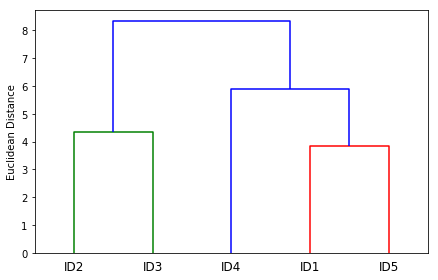

In [3]:
from scipy.cluster.hierarchy import linkage
row_clusters=linkage(df.values,method='complete',metric='euclidean')
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
row_dendr=dendrogram(row_clusters,labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.show()


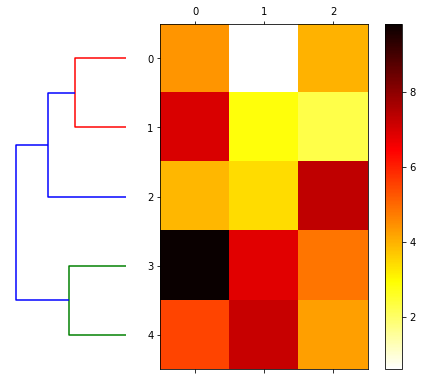

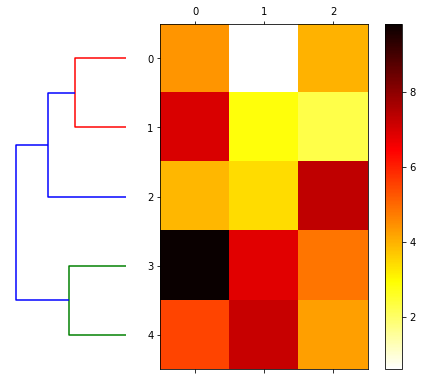

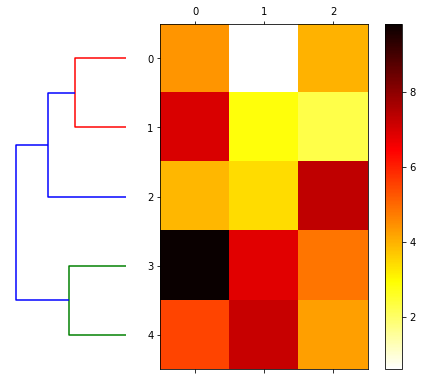

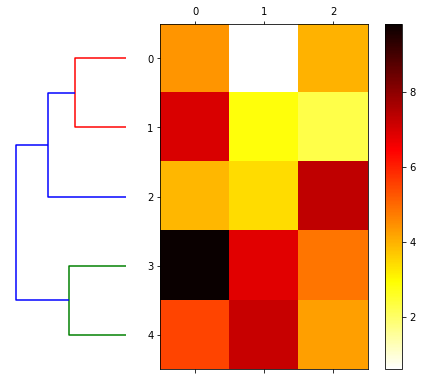

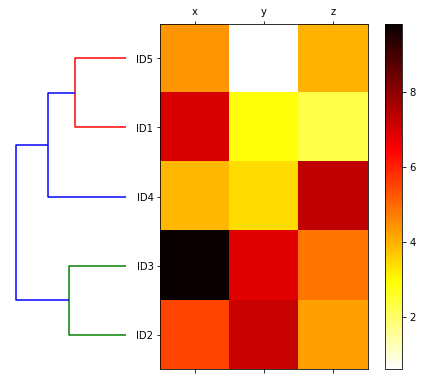

In [8]:
## hitmap
fig=plt.figure(figsize=(8,8), facecolor='white')
axd=fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr=dendrogram(row_clusters,orientation='left')
df_rowclust=df.iloc[row_dendr['leaves'][::-1]]
axm=fig.add_axes([0.23,0.1,0.6,0.6])
cax=axm.matshow(df_rowclust,interpolation='nearest',
                cmap='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels(['']+list(df_rowclust.columns))
axm.set_yticklabels(['']+list(df_rowclust.index))
plt.show()